# EDA for beverage Company for Product level Predictions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
eda_df = pd.read_excel('Downloads/forecasting_case_study.xlsx')

In [5]:
eda_df

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.00,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.00,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.00,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.00,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,SKU6,2020-10-18,96619,0.54,0,1,0,-7.56,1,0,0,0
1214,SKU6,2020-10-25,115798,0.52,0,1,0,-8.39,1,0,0,0
1215,SKU6,2020-11-01,152186,0.54,1,0,1,-7.43,1,0,0,0
1216,SKU6,2020-11-08,26445,0.44,1,0,1,-5.95,1,0,0,0


In [9]:
eda_df.set_index('date', inplace=True)

In [12]:
eda_df['day'] = eda_df.index.day
eda_df['year'] = eda_df.index.year

In [13]:
eda_df.head()

,Product,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,day,year
date,,,,,,,,,,,,,
2017-02-05,SKU1,27750,0.00,0,0,0,0.0,0,0,0,0,5,2017
2017-02-12,SKU1,29023,0.00,1,0,1,0.0,0,1,0,0,12,2017
2017-02-19,SKU1,45630,0.17,0,0,0,0.0,0,0,0,0,19,2017
2017-02-26,SKU1,26789,0.00,1,0,1,0.0,0,0,0,0,26,2017
2017-03-05,SKU1,41999,0.17,0,0,0,0.0,0,0,0,0,5,2017


### Using the corr() I will see the statistical relationship between columns

In [15]:
eda_df.corr()

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,day,year
Sales,1.000000,0.403196,0.240891,-0.121081,0.235439,0.058781,-0.085571,-0.008442,-0.010266,-0.035916,0.009950,-0.078891
Price Discount (%),0.403196,1.000000,0.217904,-0.074055,0.216127,-0.213534,0.281537,-0.044565,0.000959,-0.012153,0.036831,0.250843
In-Store Promo,0.240891,0.217904,1.000000,-0.491438,0.367004,0.056074,-0.024732,0.019761,0.019761,0.013799,0.023199,-0.031572
Catalogue Promo,-0.121081,-0.074055,-0.491438,1.000000,0.116301,0.073260,-0.094373,-0.044805,-0.044805,0.045834,-0.055539,-0.038510
Store End Promo,0.235439,0.216127,0.367004,0.116301,1.000000,0.084955,-0.075321,0.020148,-0.066610,-0.000322,-0.022635,-0.071472
Google_Mobility,0.058781,-0.213534,0.056074,0.073260,0.084955,1.000000,-0.756752,0.078227,-0.108645,0.003461,-0.052922,-0.546968
Covid_Flag,-0.085571,0.281537,-0.024732,-0.094373,-0.075321,-0.756752,1.000000,0.007924,0.007924,-0.003052,0.013360,0.722783
V_DAY,-0.008442,-0.044565,0.019761,-0.044805,0.020148,0.078227,0.007924,1.000000,-0.020101,-0.019669,-0.054072,-0.002840
EASTER,-0.010266,0.000959,0.019761,-0.044805,-0.066610,-0.108645,0.007924,-0.020101,1.000000,-0.019669,-0.106553,-0.002840
CHRISTMAS,-0.035916,-0.012153,0.013799,0.045834,-0.000322,0.003461,-0.003052,-0.019669,-0.019669,1.000000,-0.153045,-0.010954


<AxesSubplot:>

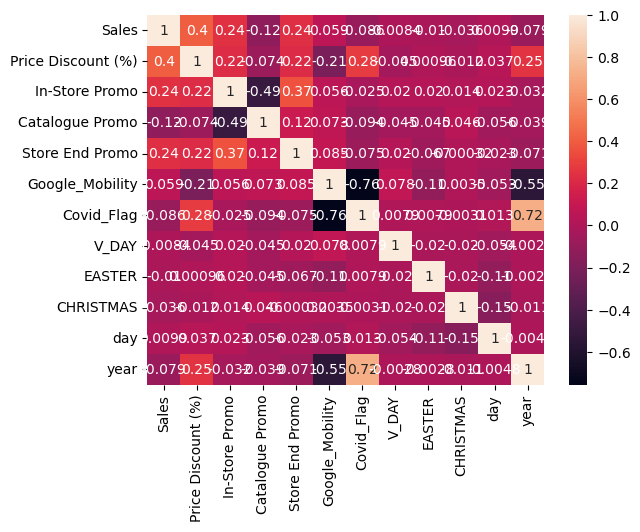

In [17]:
sns.heatmap(eda_df.corr(), annot=True)

### Looking for any NA values

In [18]:
eda_df.isna().sum()

Product               0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
day                   0
year                  0
dtype: int64

### Looking for skewness in data 

In [22]:
#Skewness 
#Skew = 3 * (Mean – Median) / Standard Deviation.
SkewData = eda_df[['Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS']]
mean = SkewData.mean()
median = SkewData.median()
stdn = SkewData.std()
Skewness = 3 * (mean - median) / stdn
print(Skewness)

Sales                 0.903676
Price Discount (%)    0.014516
In-Store Promo        2.835772
Catalogue Promo       1.558416
Store End Promo       2.195335
Google_Mobility      -1.228360
Covid_Flag            1.623200
V_DAY                 0.425154
EASTER                0.425154
CHRISTMAS             0.416028
dtype: float64


### Exploring data using Visualizations

In [26]:
eda_df['year'].unique()

array([2017, 2018, 2019, 2020], dtype=int64)

<AxesSubplot:xlabel='year', ylabel='Sales'>

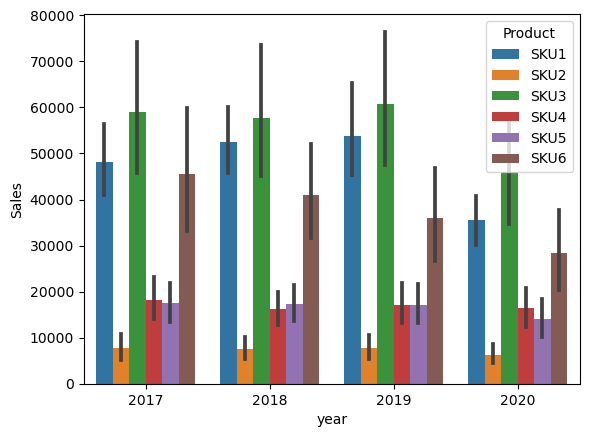

In [32]:
sns.barplot(x='year', y = 'Sales', data=eda_df, hue='Product')

<AxesSubplot:xlabel='Product', ylabel='Price Discount (%)'>

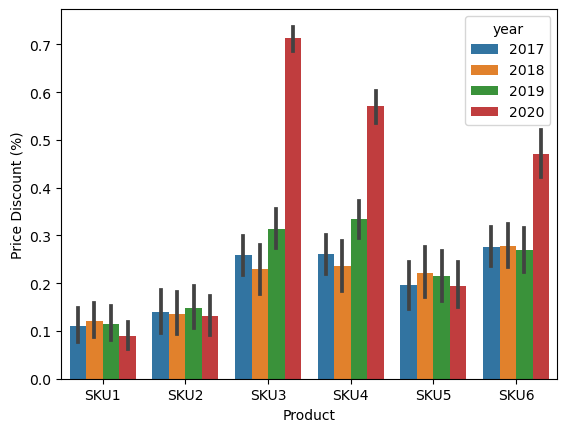

In [34]:
sns.barplot(x='Product', y = 'Price Discount (%)', data=eda_df, hue='year')

<AxesSubplot:xlabel='Product', ylabel='In-Store Promo'>

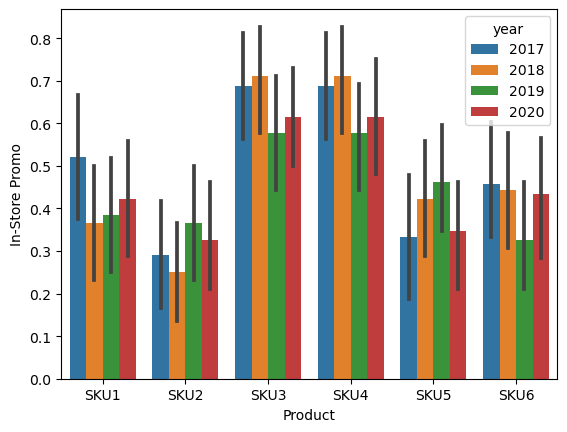

In [38]:
sns.barplot(x='Product', y = 'In-Store Promo', data=eda_df, hue='year')

<AxesSubplot:xlabel='Product', ylabel='Catalogue Promo'>

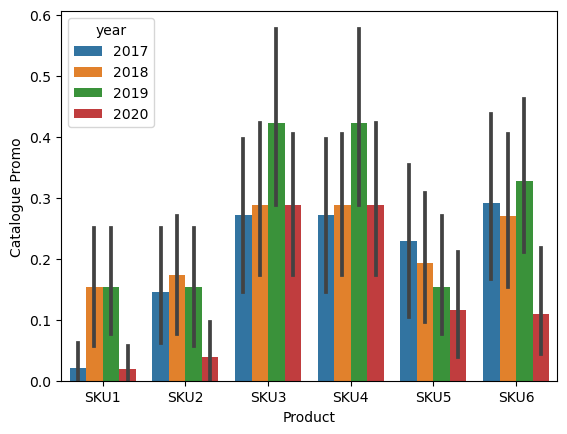

In [40]:
sns.barplot(x='Product', y = 'Catalogue Promo', data=eda_df, hue='year')

<AxesSubplot:xlabel='Product', ylabel='Store End Promo'>

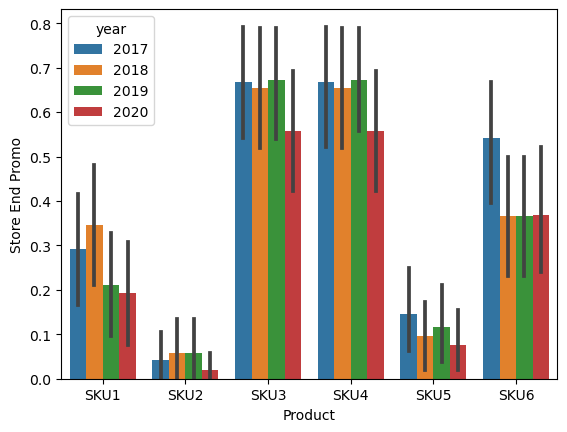

In [41]:
sns.barplot(x='Product', y = 'Store End Promo', data=eda_df, hue='year')

<AxesSubplot:xlabel='Product', ylabel='CHRISTMAS'>

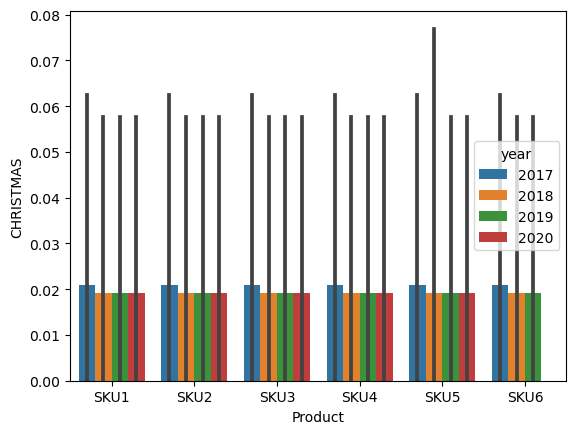

In [47]:
sns.barplot(x='Product', y = 'CHRISTMAS', data=eda_df, hue='year')

### As seen in the graphs the sales for product SKU3 and SKU1 are the highest and the all the promotions show that SKU3 and SKU4 was the most promoted from 2017 to 2020.

<AxesSubplot:xlabel='Price Discount (%)', ylabel='Sales'>

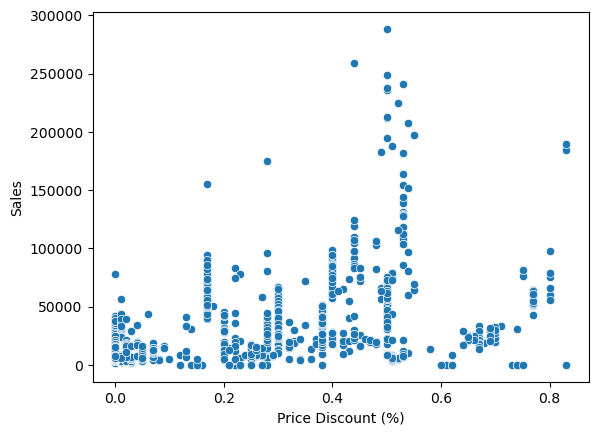

In [48]:
sns.scatterplot(x='Price Discount (%)', y='Sales', data=eda_df)

<AxesSubplot:xlabel='Price Discount (%)', ylabel='Sales'>

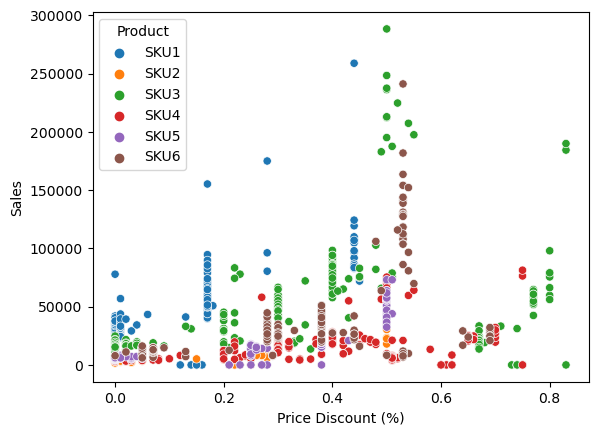

In [52]:

# Plot Sales vs Price Discount
sns.scatterplot(x='Price Discount (%)', y='Sales', data=eda_df, hue='Product')

# # Plot Sales vs In-Store Promo
# sns.scatterplot(x='In-Store Promo', y='Sales', data=eda_df)

# # Plot Sales vs Store End Promo
# sns.scatterplot(x='Store End Promo', y='Sales', data=eda_df)